# Data Augmentation And Image Pipelines

* Real Life Datasets can be large or small
* Image Pipelines are an efficient way to handle large datasets
* Data Augmentation is technique of augmenting data, which acts as a regularizer hence reduces overfitting

In [20]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import keras
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [21]:
train_image_gen = ImageDataGenerator(rescale=1.0/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.3,horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1.0/255)

In [22]:
train_gen = train_image_gen.flow_from_directory("tiny-imagenet-200/train",target_size=((224,224)),batch_size=128,class_mode='categorical')

Found 100000 images belonging to 200 classes.


In [23]:
class_ids = (train_gen.class_indices)

(128, 224, 224, 3) (128, 200)


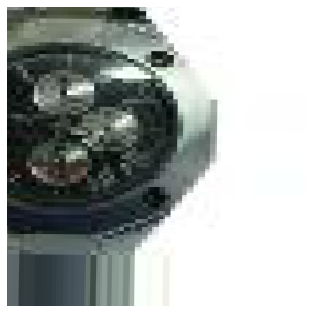

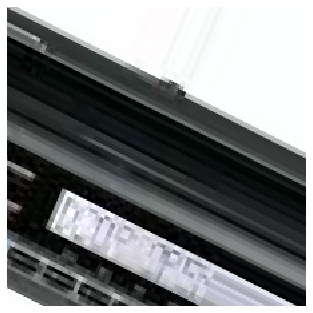

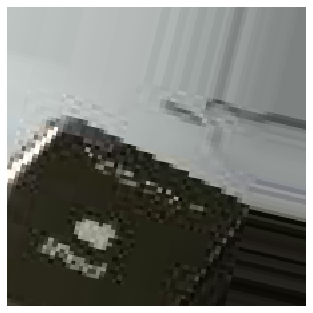

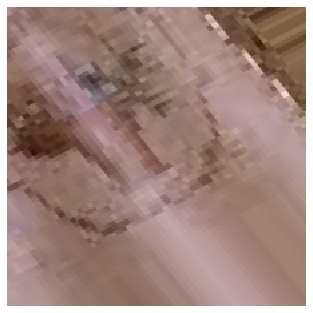

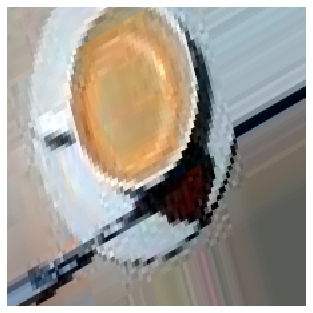

In [24]:
for (X,y) in train_gen:
    print(X.shape,y.shape)
    for i in range(5):
        plt.imshow(X[i])
        plt.axis('off')
        plt.show()
    break

In [56]:
import os
def load_validation(target_size,no_of_classes):
    with open(os.path.join("tiny-imagenet-200/val/val_annotations.txt")) as f:
        lines = f.readlines()
        m = len(lines)
        X = np.empty((m,*target_size,3),dtype=np.uint8)
        y = np.empty(m)
        
        for i,line in enumerate(lines):
            token = line.split()
            img_name = token[0]
            img_label = token[1]
            
            img_url = os.path.join("tiny-imagenet-200/val/images/{}".format(img_name))
            img = image.load_img(img_url)
            img = img.resize(target_size)
            X[i,] = np.array(img,dtype=np.float32)/255.0
            img.close()
            y[i] = class_ids[img_label]
        return X,keras.utils.to_categorical(y,num_classes=no_of_classes)

In [ ]:
X_val,y_val = load_validation((224,224),200)